In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
import sys
print(sys.version)

3.5.4 |Anaconda custom (64-bit)| (default, Nov  8 2017, 14:34:30) [MSC v.1900 64 bit (AMD64)]


### Import data

In [2]:
##Defined functions

def convert_drugs(value):
    """
    Clean up weird values for drugs text box
    :param value: value to convert
    :return: categegorical value
    """
    if value == "Caffeine (energy drinks/coffee)" or value == "Caffeine (energy drinks/coffee), Kohvi on elu, kohvi on armastus :) ":
        return "Caffeine"
    elif value.startswith("Ei") or value == "No" or value == "no":
        return "No"
    elif value == "Herbal tea" or value == 'herbal tea' or value == "tee":
        return "Tea"
    return value


In [3]:
## Read data in

general = pd.read_csv("out_general.csv", names=["row", "ts", "user_id", "gender", "age", "prev_test", "pys_activity", "sick", "pain_general", "pain_digest", "sleep_regular"])
common = pd.read_csv("out_common.csv", names=["ts", "user_id", "res_number", "res_reaction", "res_visual", "hungry", "sleepy", "time_sleep", "time_wake", "stress",
                                              "fatigue_mental", "fatigue_physical", "drugs"], header=0, 
                     converters={'ts':lambda v: pd.Timestamp(v), 
                                 'time_sleep':lambda v: pd.to_timedelta(v), 
                                 'time_wake':lambda v: pd.to_timedelta(v),
                                 'drugs': convert_drugs},
                     dtype={'hungry':'category', 
                            'sleepy':'category', 
                            'stress':'category', 
                            'fatigue_mental':'category', 
                            'fatigue_physical':'category'})

common["drugs"] = common["drugs"].astype('category')

In [4]:
common.dtypes

ts                   datetime64[ns]
user_id                       int64
res_number                    int64
res_reaction                  int64
res_visual                    int64
hungry                     category
sleepy                     category
time_sleep          timedelta64[ns]
time_wake           timedelta64[ns]
stress                     category
fatigue_mental             category
fatigue_physical           category
drugs                      category
dtype: object

### Add times from waking up

In [5]:
common.head()

,ts,user_id,res_number,res_reaction,res_visual,hungry,sleepy,time_sleep,time_wake,stress,fatigue_mental,fatigue_physical,drugs
0,2018-12-18 16:24:13,1,11,297,5119,1,2,00:30:00,07:30:00,1,Yes,"Light activity (walking, cleaning etc.)",Caffeine
1,2018-12-19 10:02:27,2,9,561,2219,2,2,01:30:00,09:30:00,3,No,No physical activity,No
2,2018-12-19 10:13:25,3,7,332,13927,1,2,00:00:00,09:20:00,1,No,No physical activity,No
3,2018-12-19 10:31:32,4,9,1085,19,1,1,23:15:00,08:15:00,1,No,"Light activity (walking, cleaning etc.)",No
4,2018-12-19 10:33:30,5,13,299,10476,1,3,01:00:00,06:37:00,3,No,No physical activity,Caffeine


In [6]:
common["hungry"].cat.categories

## Should we replace "food" and "sweets" with "No"?
## These weren't the kind of mind altering "products" we had in mind.

Index(['1', '2', '3', '4', '5'], dtype='object')

In [7]:
common["user_id"].value_counts()

## So many user_ids with only one entry? 
## Some of these should be removed => Can't be done without knowing the names. 

6     17
16    14
2     14
23    14
11    14
28    12
3     12
15    12
8     12
12    11
19    11
4     11
26     9
25     9
24     9
21     9
27     9
20     8
17     8
5      7
32     5
18     5
14     4
1      4
22     4
10     3
35     2
37     1
13     1
29     1
9      1
30     1
7      1
31     1
33     1
34     1
36     1
38     1
Name: user_id, dtype: int64

In [8]:
hungry_level_1 = common.loc[common["hungry"] == '1', ["res_number", "res_reaction", "res_visual"]]
hungry_level_3 = common.loc[common["hungry"] == '3', ["res_number", "res_reaction", "res_visual"]]

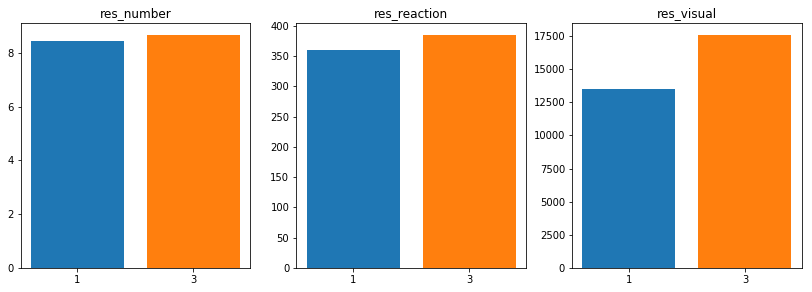

In [10]:
def draw_bar_plot(plot, title, x_axis_list, y_axis_list):
    plot.set_title(title)

    for i in range(0, len(x_axis_list)):
        plot.bar(x_axis_list[i], y_axis_list[i], align = "center")
        
        
fig, (plt1, plt2, plt3) = plt.subplots(1, 3, figsize = (14, 4.5)) 

draw_bar_plot(plt1, "res_number", ['1', '3'], [round(hungry_level_1["res_number"].mean(), 2), round(hungry_level_3["res_number"].mean(), 2)])
draw_bar_plot(plt2, "res_reaction", ['1', '3'],  [round(hungry_level_1["res_reaction"].mean(), 2), round(hungry_level_3["res_reaction"].mean(), 2)])
draw_bar_plot(plt3, "res_visual", ['1', '3'], [round(hungry_level_1["res_visual"].mean(), 2), round(hungry_level_3["res_visual"].mean(), 2)])

### Add time from wakeup

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Projects\libs\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
ts_wake = common.ts.apply(lambda x: x.replace(hour=0, minute=0, second=0)) + common.time_wake
common["awake_delta"] = (common.ts - ts_wake) / np.timedelta64(1, 's')

In [13]:
# Try an OLS model for awakeness
model = ols("res_number ~ awake_delta + hungry + sleepy + stress + fatigue_mental", common).fit()
model.summary()

<table class="simpletable">
<caption>OLS Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>       <td>res_number</td>    <th>  R-squared:         </th> <td>   0.031</td>
</tr>
<tr>
  <th>Model:</th>                   <td>OLS</td>       <th>  Adj. R-squared:    </th> <td>  -0.025</td>
</tr>
<tr>
  <th>Method:</th>             <td>Least Squares</td>  <th>  F-statistic:       </th> <td>  0.5575</td>
</tr>
<tr>
  <th>Date:</th>             <td>Wed, 16 Jan 2019</td> <th>  Prob (F-statistic):</th>  <td> 0.896</td> 
</tr>
<tr>
  <th>Time:</th>                 <td>14:11:47</td>     <th>  Log-Likelihood:    </th> <td> -497.80</td>
</tr>
<tr>
  <th>No. Observations:</th>      <td>   260</td>      <th>  AIC:               </th> <td>   1026.</td>
</tr>
<tr>
  <th>Df Residuals:</th>          <td>   245</td>      <th>  BIC:               </th> <td>   1079.</td>
</tr>
<tr>
  <th>Df Model:</th>              <td>    14</td>      <th>                     </th>     <td> </td>   
</tr>
<tr>
  <th>Covariance Type:</th>      <td>nonrobust</td>    <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
            <td></td>               <th>coef</th>     <th>std err</th>      <th>t</th>      <th>P>|t|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>Intercept</th>             <td>    8.4478</td> <td>    0.297</td> <td>   28.414</td> <td> 0.000</td> <td>    7.862</td> <td>    9.033</td>
</tr>
<tr>
  <th>hungry[T.2]</th>           <td>   -0.0386</td> <td>    0.278</td> <td>   -0.139</td> <td> 0.890</td> <td>   -0.585</td> <td>    0.508</td>
</tr>
<tr>
  <th>hungry[T.3]</th>           <td>    0.2513</td> <td>    0.357</td> <td>    0.704</td> <td> 0.482</td> <td>   -0.452</td> <td>    0.954</td>
</tr>
<tr>
  <th>hungry[T.4]</th>           <td>    0.7062</td> <td>    0.431</td> <td>    1.639</td> <td> 0.102</td> <td>   -0.142</td> <td>    1.555</td>
</tr>
<tr>
  <th>hungry[T.5]</th>           <td>    0.6944</td> <td>    1.213</td> <td>    0.572</td> <td> 0.568</td> <td>   -1.695</td> <td>    3.084</td>
</tr>
<tr>
  <th>sleepy[T.2]</th>           <td>    0.0714</td> <td>    0.357</td> <td>    0.200</td> <td> 0.842</td> <td>   -0.632</td> <td>    0.775</td>
</tr>
<tr>
  <th>sleepy[T.3]</th>           <td>    0.2237</td> <td>    0.360</td> <td>    0.621</td> <td> 0.535</td> <td>   -0.486</td> <td>    0.933</td>
</tr>
<tr>
  <th>sleepy[T.4]</th>           <td>    0.0449</td> <td>    0.380</td> <td>    0.118</td> <td> 0.906</td> <td>   -0.703</td> <td>    0.793</td>
</tr>
<tr>
  <th>sleepy[T.5]</th>           <td>    0.1312</td> <td>    0.485</td> <td>    0.270</td> <td> 0.787</td> <td>   -0.824</td> <td>    1.086</td>
</tr>
<tr>
  <th>stress[T.2]</th>           <td>   -0.3306</td> <td>    0.262</td> <td>   -1.263</td> <td> 0.208</td> <td>   -0.846</td> <td>    0.185</td>
</tr>
<tr>
  <th>stress[T.3]</th>           <td>   -0.2346</td> <td>    0.353</td> <td>   -0.665</td> <td> 0.507</td> <td>   -0.930</td> <td>    0.460</td>
</tr>
<tr>
  <th>stress[T.4]</th>           <td>   -0.0694</td> <td>    0.347</td> <td>   -0.200</td> <td> 0.842</td> <td>   -0.753</td> <td>    0.614</td>
</tr>
<tr>
  <th>stress[T.5]</th>           <td>   -1.8642</td> <td>    1.237</td> <td>   -1.507</td> <td> 0.133</td> <td>   -4.302</td> <td>    0.573</td>
</tr>
<tr>
  <th>fatigue_mental[T.Yes]</th> <td>    0.1900</td> <td>    0.260</td> <td>    0.732</td> <td> 0.465</td> <td>   -0.321</td> <td>    0.701</td>
</tr>
<tr>
  <th>awake_delta</th>           <td>-1.062e-06</td> <td> 4.94e-06</td> <td>   -0.215</td> <td> 0.830</td> <td>-1.08e-05</td> <td> 8.68e-06</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Omnibus:</th>       <td> 8.022</td> <th>  Durbin-Watson:     </th> <td>   1.952</td>
</tr>
<tr>
  <th>Prob(Omnibus):</th> <td> 0.018</td> <th>  Jarque-Bera (JB):  </th> <td>   9.434</td>
</tr>
<tr>
  <th>Skew:</th>          <td>-0.281</td> <th>  Prob(JB):          </th> <td> 0.00894</td>
</tr>
<tr>
  <th>Kurtosis

In [14]:
fig,plots  = plt.subplots(1,1)
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

In [13]:
grouped.mean()["res_reaction"].unstack().plot()

NameError: name 'grouped' is not defined

In [177]:
import seaborn
seaborn.lmplot()